In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import cv2
import PIL.Image as Image
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
image_df = pd.read_csv('/content/ckextended.csv')
image_df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [3]:
image_df['emotion'].value_counts()

6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: emotion, dtype: int64

In [4]:
classes = ["Anger","Disgust","Fear","Happiness","Sadness","Surprise","Neutral","Contempt"]

In [5]:
image_df['Usage'].value_counts()

Training       734
PrivateTest     95
PublicTest      91
Name: Usage, dtype: int64

In [6]:
images=[]
labels=[]

In [7]:
total = image_df.shape[0]

In [8]:
def string_to_image(pixel_string, width, height):
    pixels = np.array(pixel_string.split(), dtype=np.uint8)
    return pixels.reshape((height, width))

In [9]:
IMAGE_SHAPE = (48, 48)
for i in range(total):
    pixel_string = image_df['pixels'].iloc[i]
    emotion = image_df['emotion'].iloc[i]
    width, height = (IMAGE_SHAPE)
    image_data = string_to_image(pixel_string, width, height)
    images.append(image_data)
    labels.append(emotion)
    #plt.subplot(1, 4, i + 1)
    #plt.imshow(image_data, cmap='gray')
    #plt.title(f'Emotion: {classes[emotion]}')
    #plt.axis('off')

#plt.show()

In [10]:
labels = np.array(labels)
images = np.array(images)

In [11]:
images = images/255

In [12]:
num_of_classes=8
labels_encoded = keras.utils.to_categorical(labels,num_classes = num_of_classes)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(images,labels_encoded,test_size=0.2,random_state=10)

In [14]:
print(X_train.shape,' ',X_test.shape)

(736, 48, 48)   (184, 48, 48)


In [24]:
classifier_model = keras.models.Sequential(
    [
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(8,activation='softmax')
    ]
)

In [25]:
classifier_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
filepath = '/content/best_performing_model.sav'
checkpoint = keras.callbacks.ModelCheckpoint(filepath = filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
callbacks = [checkpoint]

In [26]:
history = classifier_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.2,callbacks=callbacks)

Epoch 1/20
18/19 [===========================>..] - ETA: 0s - loss: 1.4772 - accuracy: 0.6215
Epoch 1: val_loss improved from inf to 1.42048, saving model to /content/best_performing_model.sav
19/19 [==============================] - 5s 168ms/step - loss: 1.4762 - accuracy: 0.6207 - val_loss: 1.4205 - val_accuracy: 0.6216
Epoch 2/20
18/19 [===========================>..] - ETA: 0s - loss: 1.3492 - accuracy: 0.6528
Epoch 2: val_loss improved from 1.42048 to 1.41569, saving model to /content/best_performing_model.sav
19/19 [==============================] - 3s 147ms/step - loss: 1.3541 - accuracy: 0.6497 - val_loss: 1.4157 - val_accuracy: 0.6216
Epoch 3/20
18/19 [===========================>..] - ETA: 0s - loss: 1.3185 - accuracy: 0.6510
Epoch 3: val_loss did not improve from 1.41569
19/19 [==============================] - 2s 99ms/step - loss: 1.3188 - accuracy: 0.6497 - val_loss: 1.4273 - val_accuracy: 0.6216
Epoch 4/20
18/19 [===========================>..] - ETA: 0s - loss: 1.3114 - 

In [27]:
classifier_model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 27ms/step - loss: 0.3376 - accuracy: 0.8804


[0.3375993072986603, 0.8804348111152649]

In [28]:
y_predictions = classifier_model.predict(X_test)
y_predictions = [np.argmax(i) for i in y_predictions]
y_actual = [np.argmax(i) for i in y_test]

6/6 [==============================] - 0s 43ms/step


### Model Performance

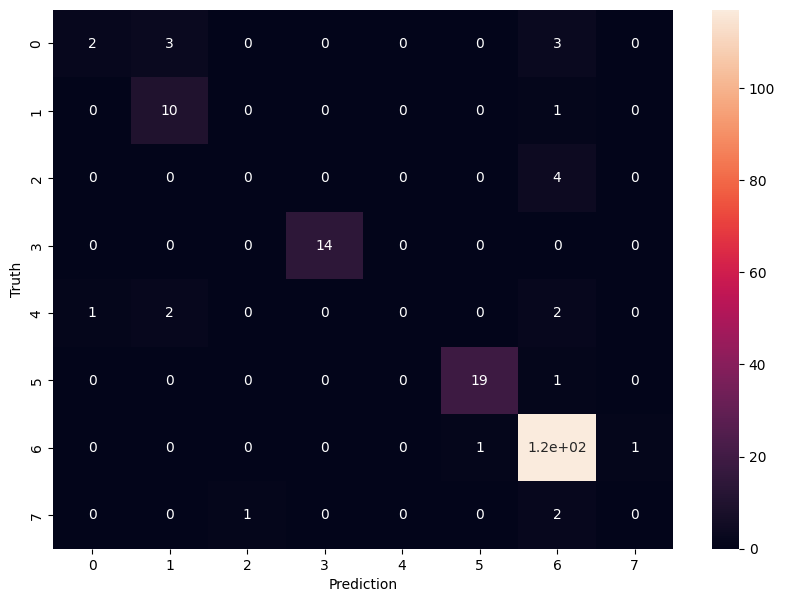

In [30]:
cm = confusion_matrix(y_actual,y_predictions)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

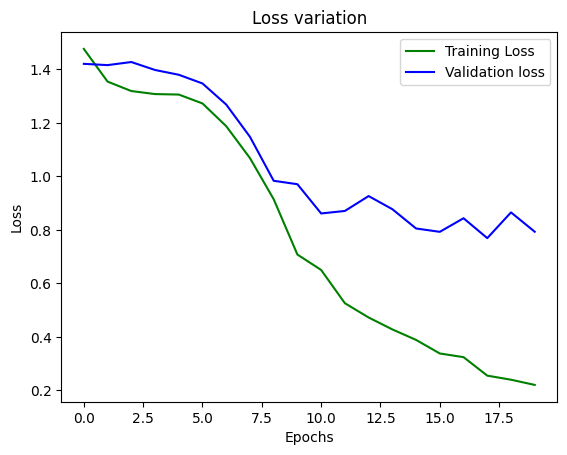

In [31]:
#Plotting the training history
plt.plot(history.history['loss'],color='green',label='Training Loss')
plt.plot(history.history['val_loss'],color='blue',label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss variation')
plt.savefig('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


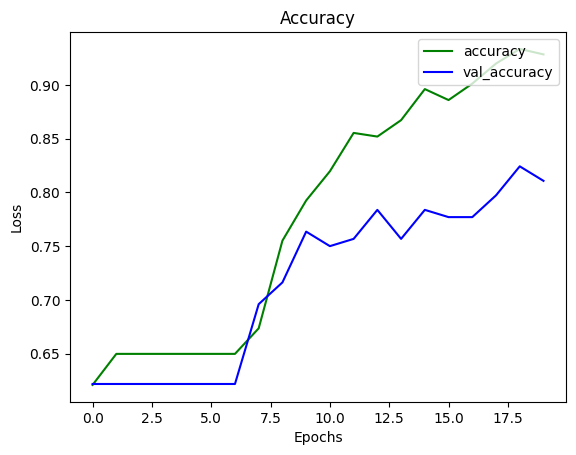

In [32]:
plt.plot(history.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(loc = 'upper right')
plt.show()